### Choose an image of your choice and apply histogram equalization to it. Apply histogram equalization to the resulting image and compare the two images. What are your observations? 

In [10]:
%matplotlib inline

import cv2
import numpy as np
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt
import math

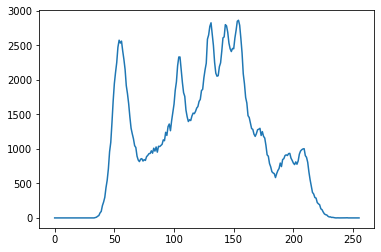

In [11]:
img = './DIP_2019_A1/lena.jpg'
img = cv2.imread(img, 0)

hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist) 
plt.show()

In [12]:
def histEqualization(image):
    
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    
    cf = [0] * 256
    cf[0] = hist1[0][0]
    
    for i in range(1, 256):
        cf[i] = cf[i-1] + hist1[i][0]
        
    for i in range(0, 256):
        if hist1[i][0] == 0:
            cf[i] = 0
    
    for i in range(0, len(cf)):
        cf[i] = (cf[i]/img.size)*255
    
    for i in range(0, len(cf)):
        cf[i] = math.floor(cf[i])
        
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            for k in range(0, 256):
                if img[i][j] == k:
                    img[i][j] = cf[k]
                    break
    
    
    return img

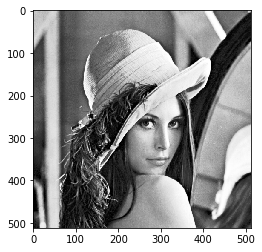

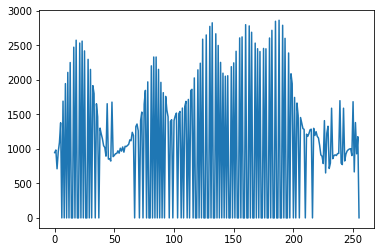

In [14]:
img1 = histEqualization(img)

plt.imshow(img1, cmap='gray')
plt.show()

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])

plt.plot(hist1) 
plt.show()

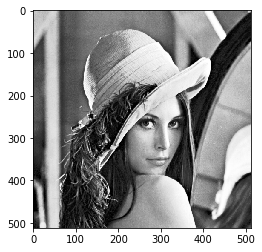

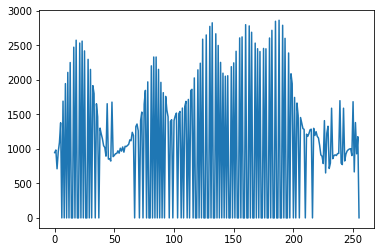

In [15]:
img2 = histEqualization(img)

plt.imshow(img2, cmap='gray')
plt.show()

hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

plt.plot(hist2) 
plt.show()